# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['figure.dpi'] = 70

⭐Run the following code to read in the "cardio.csv" file.

In [125]:
df = pd.read_csv("cardio.csv", sep=";")

In [126]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [128]:
df.shape

(70000, 13)

In [129]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

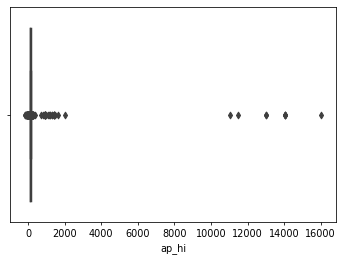

In [130]:
sns.boxplot(df.ap_hi);

In [131]:
df = df[(df.ap_hi < 250) & (df.ap_hi > 0)]

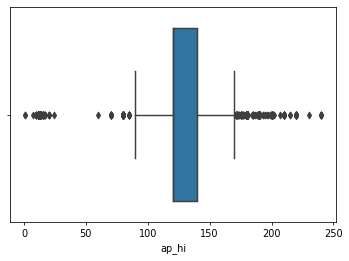

In [132]:
sns.boxplot(df.ap_hi);

In [133]:
iqr = stats.iqr(df.ap_hi)
iqr

20.0

In [134]:
np.percentile(df.ap_hi, 75) + 1.5*iqr

170.0

In [135]:
np.percentile(df.ap_hi, 25) - 1.5*iqr

90.0

In [136]:
df = df[(df.ap_hi < 170) & (df.ap_hi > 90)]

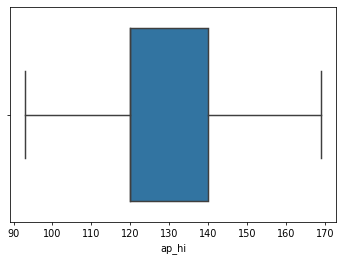

In [137]:
sns.boxplot(df.ap_hi);

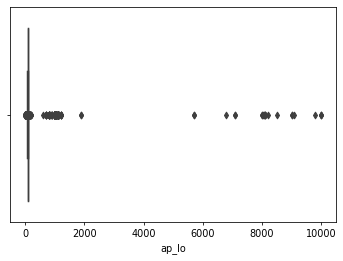

In [138]:
sns.boxplot(df.ap_lo);

In [139]:
df = df[(df.ap_lo < 110) & (df.ap_lo > 60)]

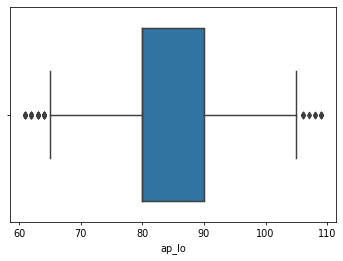

In [140]:
sns.boxplot(df.ap_lo);

In [141]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000
mean,49979.559451,19488.099508,1.351928,164.466256,74.211244,126.346242,81.714838,1.362315,1.225115,0.087665,0.052934,0.803600,0.495927
std,28857.662001,2457.996448,0.477576,8.144080,14.082985,13.779643,7.639202,0.679101,0.572492,0.282809,0.223904,0.397278,0.499987
min,0.000000,10859.000000,1.000000,55.000000,11.000000,93.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24942.500000,17713.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50037.000000,19714.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74899.750000,21338.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,169.000000,109.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
df = df.sample(500)

In [143]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,50256.750000,19542.152000,1.340000,163.814000,74.096000,126.168000,81.300000,1.362000,1.240000,0.066000,0.060000,0.814000,0.496000
std,28259.171888,2507.081393,0.474183,9.178229,13.346124,13.965452,7.657629,0.666216,0.585736,0.248531,0.237725,0.389496,0.500485
min,175.000000,14338.000000,1.000000,67.000000,48.000000,100.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,26856.250000,17621.000000,1.000000,158.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49636.000000,19741.500000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,73906.750000,21830.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99820.000000,23607.000000,2.000000,190.000000,127.000000,160.000000,108.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [144]:
df.ap_hi.mean()

126.168

⭐What is the standard deviation for Systolic blood pressure?

In [145]:
df.ap_hi.std()

13.965451789590437

⭐What is the standard error of the mean for Systolic blood pressure?

In [146]:
df.ap_hi.sem()

0.6245539907604061

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [147]:
df.ap_hi.describe()

count    500.000000
mean     126.168000
std       13.965452
min      100.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      160.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [148]:
stats.t.interval(0.90, 499, loc = df.ap_hi.mean(), scale = df.ap_hi.sem())

(125.13878936937962, 127.19721063062039)

In [149]:
stats.t.interval(0.95, 499, loc = df.ap_hi.mean(), scale = df.ap_hi.sem())

(124.9409204180944, 127.39507958190562)

In [150]:
stats.t.interval(0.99, 499, loc = df.ap_hi.mean(), scale = df.ap_hi.sem())

(124.55307970203297, 127.78292029796704)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [151]:
stats.ttest_1samp(df.ap_hi, 122)

Ttest_1sampResult(statistic=6.673562352752543, pvalue=6.656418417891208e-11)

0 hipotezini reddettir. Çift kuyruk bakmamızın sebebi de nasıl olsa küçük olması

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [152]:
df.groupby("gender").ap_hi.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,330.0,125.912121,14.665516,100.0,120.0,120.0,140.0,160.0
2,170.0,126.664706,12.521671,100.0,120.0,120.0,140.0,160.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [153]:
stats.levene(df[df.gender == 1].ap_hi, df[df.gender == 2].ap_hi)
# varyansların homojelıgını test eder

LeveneResult(statistic=0.11324775865792144, pvalue=0.7366182354217503)

In [154]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.113, p=0.737
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [155]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"], equal_var=True)
# livenne test True oldugu için eqaul_var True dememız gerekır

Ttest_indResult(statistic=-0.5704308982834101, pvalue=0.5686427515883683)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

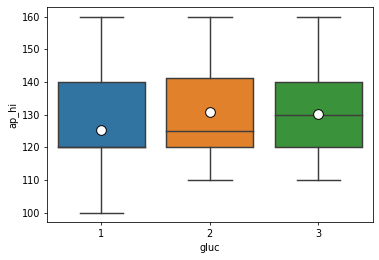

In [156]:
sns.boxplot(x = df.gluc, y = df.ap_hi, showmeans = True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"});

⭐Show the descriptive statistics of 3 groups.

In [157]:
df.groupby("gluc").ap_hi.describe()

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,420.0,125.342857,13.735885,100.0,120.0,120.0,140.00,160.0
2,40.0,130.750000,16.891433,110.0,120.0,125.0,141.25,160.0
3,40.0,130.250000,11.709628,110.0,120.0,130.0,140.00,160.0


⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [158]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"],
               df[df["gluc"]==2]["ap_hi"],
               df[df["gluc"]==3]["ap_hi"])

F_onewayResult(statistic=4.662181510179191, pvalue=0.009862785391228628)

**ho hipoteizini reddebiliriz**

In [159]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [162]:
multicomp = MultiComparison(df.ap_hi, df.gluc)

In [164]:
tukey = multicomp.tukeyhsd(alpha = 0.05)

In [165]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   5.4071 0.0492  0.0142   10.8   True
     1      3   4.9071 0.0831 -0.4858   10.3  False
     2      3     -0.5 0.9858 -7.7876 6.7876  False
---------------------------------------------------


**Sadece 1 ile 2 arasınd anlamlı bir fark var**

## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

⭐Create a crosstab using Pandas.

In [168]:
ct = pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,46,47
1,206,201


In [ ]:
kardiyosu ve active göre sayıları gosterıyor

⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [170]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [171]:
print("test statictis", chi)
print("p-value", p)

test statictis 0.007312507312507412
p-value 0.9318534021151806


**active ile cardio degıskenı arasında bır bag bulunamadı**

In [172]:
ct = pd.crosstab(df.cholesterol, df.cardio)
ct

cardio,0,1
cholesterol,,
1,214,158
2,29,46
3,9,44


In [173]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [174]:
print("test statictis", chi)
print("p-value", p)

test statictis 35.36691188974581
p-value 2.0901269360393017e-08


In [175]:
stats.chi2_contingency(ct)

(35.36691188974581,
 2.0901269360393017e-08,
 2,
 array([[187.488, 184.512],
        [ 37.8  ,  37.2  ],
        [ 26.712,  26.288]]))

**Degerlerden biri 5'in altında oldugu zana ki kare kulanılmaz**

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

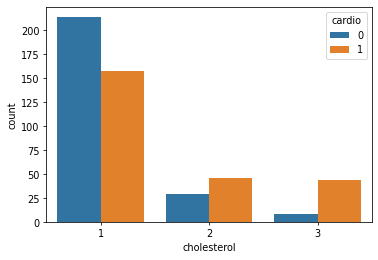

In [177]:
sns.countplot(x = df.cholesterol, hue = df.cardio)